In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np

drive.mount('/content/drive')


path = '/content/drive/My Drive/bank_marketing_dataset.csv'

df=pd.read_csv(path)
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
df=df[["age","job","balance","loan","contact"]]
df.isnull().sum()

,0
age,0
job,0
balance,0
loan,0
contact,0


In [ ]:
X = df[["age", "job", "balance", "loan"]]
y = df["contact"]
df.head()



,age,job,balance,loan,contact
0,59,admin.,2343,no,unknown
1,56,admin.,45,no,unknown
2,41,technician,1270,no,unknown
3,55,services,2476,no,unknown
4,54,admin.,184,no,unknown


In [ ]:
#encoding for sex and embarked
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["job"]=le.fit_transform(df["job"])
df["loan"]=le.fit_transform(df["loan"])
df["contact"]=le.fit_transform(df["contact"])
df.head()

,age,job,balance,loan,contact
0,59,0,2343,0,2
1,56,0,45,0,2
2,41,9,1270,0,2
3,55,7,2476,0,2
4,54,0,184,0,2


In [ ]:
X = df[["age", "job", "balance", "loan"]]
y = df["contact"]
df.head()



,age,job,balance,loan,contact
0,59,0,2343,0,2
1,56,0,45,0,2
2,41,9,1270,0,2
3,55,7,2476,0,2
4,54,0,184,0,2


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=0)
classifier.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=4, random_state=0)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=classifier.predict(X_test)
acc=accuracy_score(y_test,y_pred)
print(acc)

0.7268248992386923


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[1603   12    0]
 [ 134   21    0]
 [ 463    0    0]]


<Axes: >

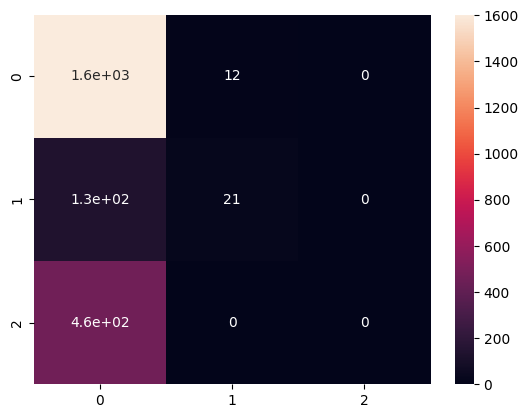

In [ ]:

import seaborn as sns
sns.heatmap(cm,annot=True)

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plot_tree(classifier,feature_names=X.columns,class_names=['cellular', 'telephone', 'unknown'],filled=True)
plt.show()

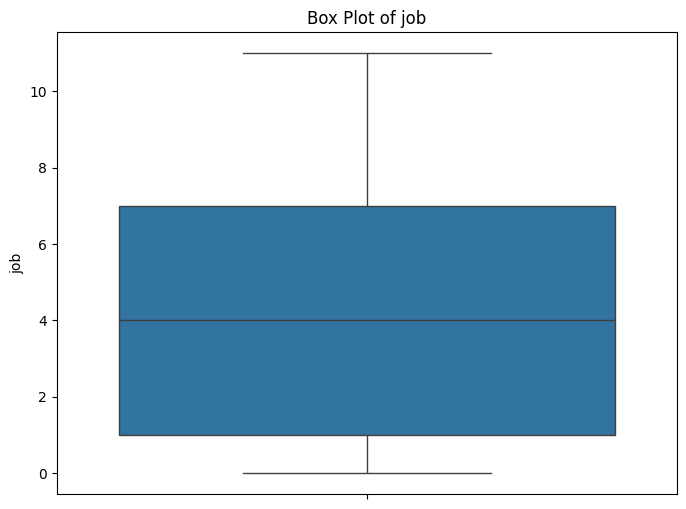

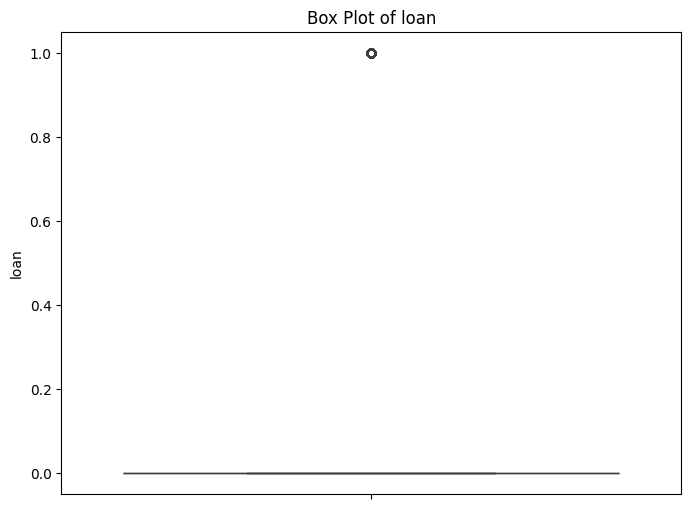

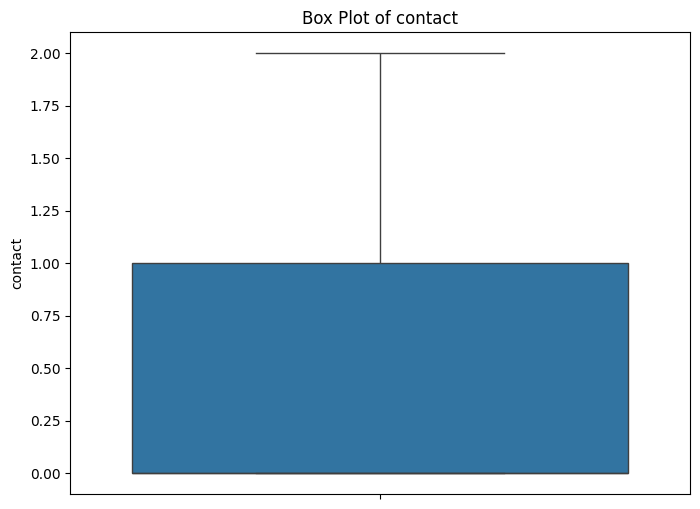

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Specific columns requested by the user
specific_cols = ['job', 'loan', 'contact']

# Create a box plot for each of the specified columns
for column in specific_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)
    plt.show()

In [ ]:
newacc=pd.DataFrame([[58,0,2000,1]],columns=X.columns)
prediction=classifier.predict(newacc)
prediction

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([1])

In [ ]:
if prediction==0:
  print("No")
else:
  print("Yes")

Yes
